In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Train.csv')
print(f"df shape: {df.shape}")
print(f"columns: {df.columns}")

df shape: (8523, 12)
columns: Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [20]:
df_0 = df.copy()
miss, key, key_new = 'Item_Weight', 'Item_Identifier', 'Item_No'
identifier_cnt_0, identifier_cnt_1, identifier_unique = getattr(df, key).unique(), getattr(df[getattr(df, miss).isna()==False], key).unique(), []
for id in identifier_cnt_0:
    if id not in identifier_cnt_1:
        identifier_unique.append(id)
df_0[key_new] = pd.factorize(getattr(df,key))[0]
grouped = pd.DataFrame(df_0.groupby(key_new)[miss].nunique().reset_index())
test = grouped.merge(df_0[df_0['Item_Weight'].isna()==False][['Item_Identifier', 'Item_No', 'Item_Weight']].drop_duplicates(), how='left', on='Item_No')
test

,Item_No,Item_Weight_x,Item_Identifier,Item_Weight_y
0,0,1,FDA15,9.300
1,1,1,DRC01,5.920
2,2,1,FDN15,17.500
3,3,1,FDX07,19.200
4,4,1,NCD19,8.930
...,...,...,...,...
1554,1554,1,FDD28,10.695
1555,1555,1,FDU43,19.350
1556,1556,1,NCF55,6.675
1557,1557,1,NCW30,5.210


In [19]:
test[test['Item_Weight_y'].isna() == True]

,Item_No,Item_Weight_x,Item_Identifier,Item_Weight_y
711,711,0,NaN,NaN
1130,1130,0,NaN,NaN
1494,1494,0,NaN,NaN
1539,1539,0,NaN,NaN


In [14]:
miss, key, key_new = 'Item_Visibility', 'Item_Identifier', 'Item_No'
df_0 = df[[miss, key]]
identifier_cnt_0, identifier_cnt_1, identifier_unique = getattr(df, key).unique(), getattr(df[getattr(df, miss)!=0], key).unique(), []
for id in identifier_cnt_0:
    if id not in identifier_cnt_1:
        identifier_unique.append(id)
df_0[key_new] = pd.factorize(getattr(df,key))[0]
df_0 = df_0[getattr(df, miss)!=0]
avg = df_0.groupby(by=[key, key_new]).mean().reset_index().rename(columns={miss:'mean'})
med = df_0.groupby(by=[key, key_new]).median().reset_index().rename(columns={miss:'median'})
maxi = df_0.groupby(by=[key, key_new]).max().reset_index().rename(columns={miss:'max'})
mini = df_0.groupby(by=[key, key_new]).min().reset_index().rename(columns={miss:'min'})
final = avg.merge(med,how='left',on=[key, key_new]).merge(maxi,how='left',on=[key, key_new]).merge(mini,how='left',on=[key, key_new])
final

C:\Users\wxx19\AppData\Local\Temp\ipykernel_21288\2221617497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0[key_new] = pd.factorize(getattr(df,key))[0]


,Item_Identifier,Item_No,mean,median,max,min
0,DRA12,113,0.047934,0.041145,0.068535,0.040912
1,DRA24,832,0.048062,0.039990,0.069909,0.039735
2,DRA59,1113,0.153963,0.128127,0.223985,0.127308
3,DRB01,1429,0.082126,0.082171,0.082367,0.081841
4,DRB13,965,0.008002,0.007055,0.011791,0.007038
...,...,...,...,...,...,...
1554,NCZ30,869,0.029116,0.026203,0.043828,0.026058
1555,NCZ41,707,0.064529,0.064480,0.064786,0.064368
1556,NCZ42,364,0.011305,0.011296,0.011352,0.011279
1557,NCZ53,891,0.027775,0.024515,0.040970,0.024359


<Axes: >

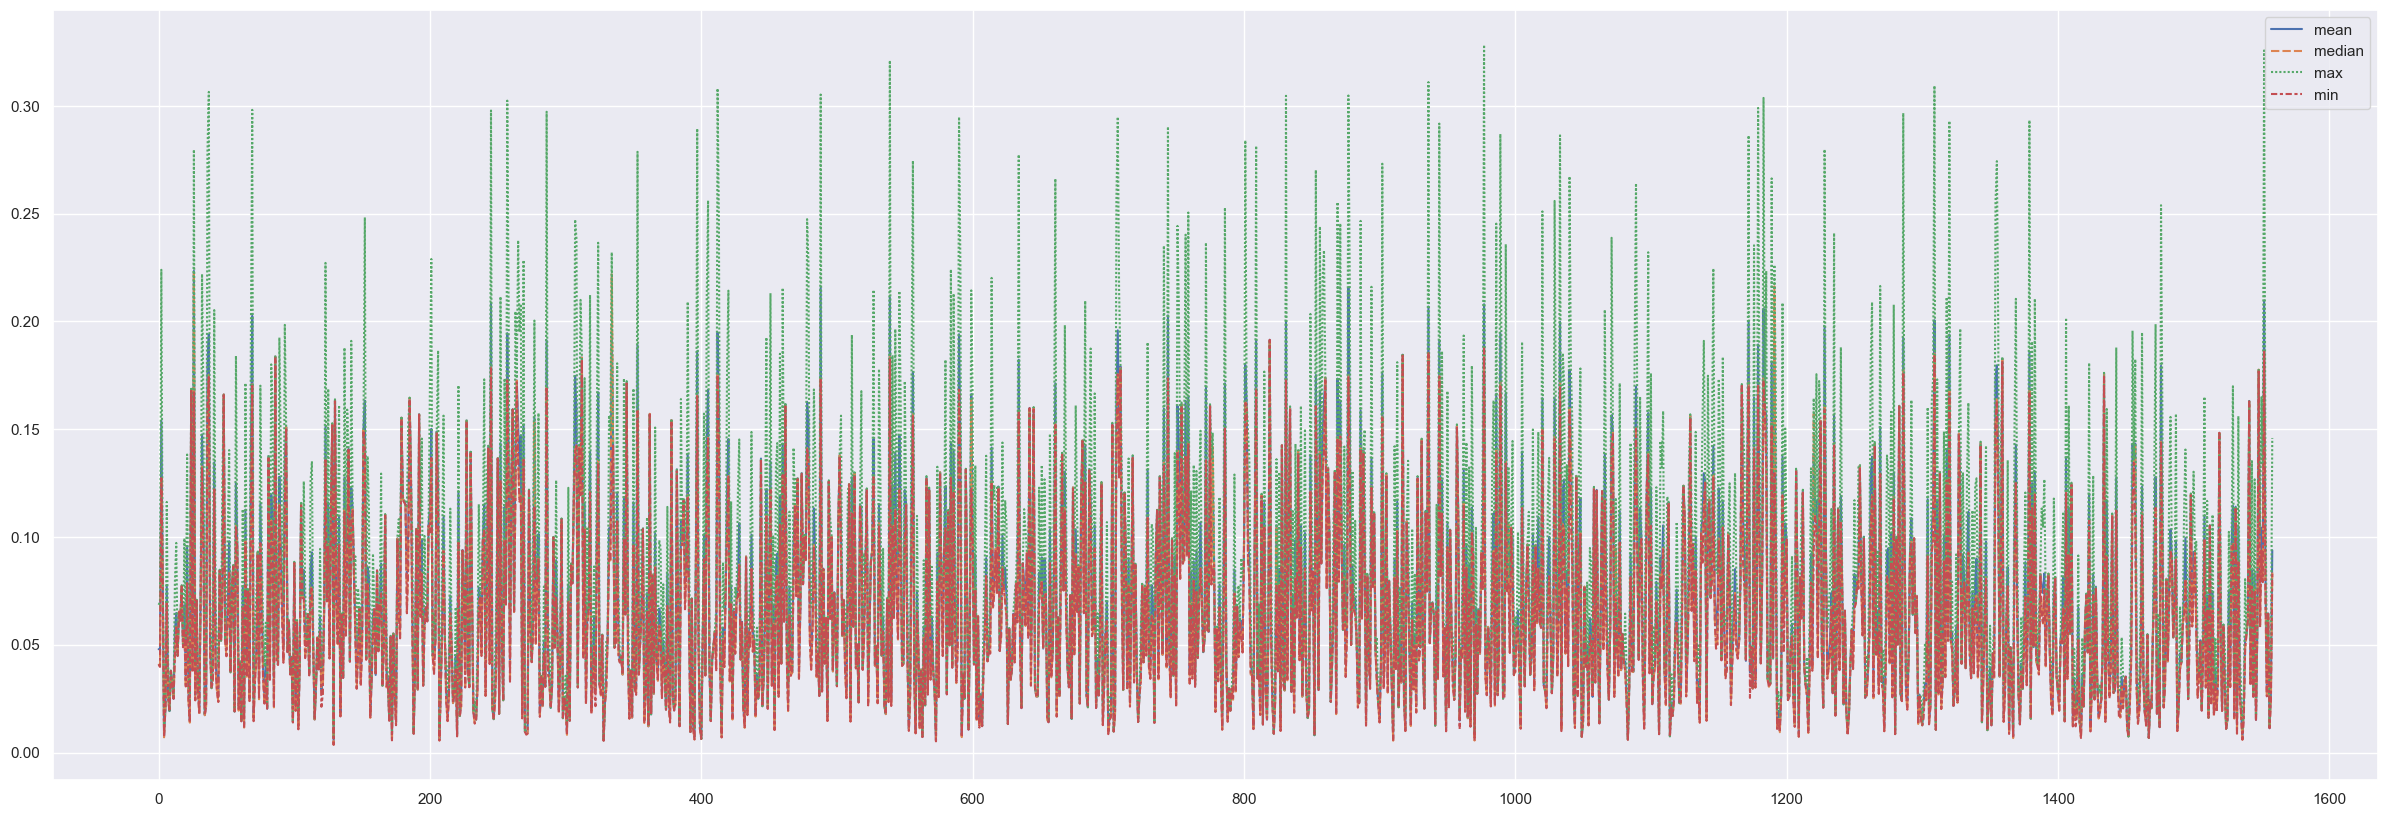

In [20]:
plt.figure(figsize=(30,10))
sns.set()
sns.lineplot(data=final[['mean','median','max','min']])

In [8]:
from pandasql import sqldf
from sqlalchemy import text
query = text("select distinct * from mini")
res = sqldf(query)

# pysqldf = lambda q: sqldf(q, globals())
# df_sql = pysqldf("""
# select distinct * from mini
# """)

TypeError: expected string or bytes-like object, got 'TextClause'